# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Business Understanding: Optimizing Car Inventory and Pricing Strategy

# The primary question from a business perspective is identifying which cars are worth buying and determining the optimal selling price for each. 
# This challenge translates into a predictive modeling task in the realm of data science. By leveraging both numerical and categorical data 
# from past car sales, the goal is to build a robust predictive model. This model aims to accurately forecast the sale price of individual cars, 
# taking into account various influencing factors like make, model, year, condition, and mileage, among others.
# Understanding these key variables not only aids in setting competitive prices but also guides strategic decisions in inventory selection. 
# Additionally, insights gained from this analysis can inform future data collection efforts, focusing on the most impactful variables for 
# price prediction. This approach ultimately supports the dual objectives of maximizing sales revenue and enhancing customer satisfaction.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
# Business Understanding: Enhancing Data Quality for Accurate Price Prediction

# In our pursuit to optimize used car pricing strategies, the preliminary step involves rigorous data cleaning and preprocessing. 
# This includes eliminating or interpolating NaN values and critically evaluating each column to determine its relevance to our analysis.
# A key aspect of this process is identifying and appropriately handling outliers and potential data errors, which can significantly skew our results.
# To understand relationships within our data, we will conduct cross-correlation analysis and generate scatter plots. Given the large size of the dataset, 
# these scatter plots will be generated on random subsets to ensure computational efficiency while maintaining representativeness.
# Additionally, we'll focus on visualizing how key variables influence car prices. The large dataset offers an opportunity to observe variability 
# within nearly identical data points, providing insights into the extent of variability captured by the available data.
# These steps lay the foundation for building a robust predictive model and are crucial in ensuring the accuracy and reliability of our price predictions.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Path to the CSV file
file_path = 'data/vehicles.csv'

# Loading the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# Selecting columns which are of object type
object_cols = df.select_dtypes(include=['object']).columns

# Replacing null values in these columns with "unknown"
df[object_cols] = df[object_cols].fillna('unknown')


In [6]:
# Data Preprocessing: Column Selection and Cleaning

# 1. Dropping Irrelevant Columns:
# - 'manufacturer': Redundant information already captured in 'model'.
# - 'drive', 'size': Majority are 'unknown', hence dropped.
# - 'type': Redundant with 'model', so dropped.
# - 'VIN': Non-informative for our analysis.
# - 'state': Redundant information for our current scope.

# 2. Handling High Cardinality and Important Columns:
# - 'region': Although important, it has high cardinality. We'll replace it with the mean cost per region.
# - 'model': Contains many unique values. To simplify, we'll replace it with the mean cost per model.

# Note: These steps aim to streamline the dataset by removing less impactful features and simplifying high cardinality variables.

In [7]:
# Dropping rows where any of the numeric columns have NaN values

df.drop('VIN', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)
df.drop('drive', axis=1, inplace=True)
df.drop('size', axis=1, inplace=True)
df.drop('paint_color', axis=1, inplace=True)#not worth the 10 extra variables
df.drop('manufacturer', axis=1, inplace=True)
df.drop('title_status', axis=1, inplace=True)
#df.drop('cylinders', axis=1, inplace=True)
df = df[df['price'] <= 77000]#eliminate eronious prices more than 4 stds above mean
df = df[df['price'] >= 10]#if price is 0 its not sale
df = df[df['odometer'] <= 500000]#eliminate eronious prices more than 4 stds above mean

df = df.set_index('id')
numeric_cols = df.select_dtypes(include=['number']).columns
df = df.dropna(subset=numeric_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385347 entries, 7316814884 to 7301591129
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        385347 non-null  object 
 1   price         385347 non-null  int64  
 2   year          385347 non-null  float64
 3   model         385347 non-null  object 
 4   condition     385347 non-null  object 
 5   cylinders     385347 non-null  object 
 6   fuel          385347 non-null  object 
 7   odometer      385347 non-null  float64
 8   transmission  385347 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 29.4+ MB


In [8]:
df['condition'].unique()
# Define the mapping dictionary
condition_mapping = {
    'fair': 1,
    'good': 2,
    'unknown': 1.5,  # 'unknown' treated the same as 'good'
    'excellent': 3,
    'like new': 4,
    'new': 5,
    'salvage': 0
}

# Apply the mapping to the 'condition' column
df['condition'] = df['condition'].map(condition_mapping)

# Display the DataFrame to confirm the changes
print(df.head())

            region  price    year                     model  condition  \
id                                                                       
7316814884  auburn  33590  2014.0  sierra 1500 crew cab slt        2.0   
7316814758  auburn  22590  2010.0            silverado 1500        2.0   
7316814989  auburn  39590  2020.0       silverado 1500 crew        2.0   
7316743432  auburn  30990  2017.0      tundra double cab sr        2.0   
7316356412  auburn  15000  2013.0                 f-150 xlt        3.0   

              cylinders fuel  odometer transmission  
id                                                   
7316814884  8 cylinders  gas   57923.0        other  
7316814758  8 cylinders  gas   71229.0        other  
7316814989  8 cylinders  gas   19160.0        other  
7316743432  8 cylinders  gas   41124.0        other  
7316356412  6 cylinders  gas  128000.0    automatic  


In [9]:
df['region'].value_counts()

region
columbus               3373
jacksonville           3033
grand rapids           2920
new hampshire          2920
milwaukee              2899
                       ... 
meridian                 20
southwest MS             12
kansas city              10
west virginia (old)       8
fort smith, AR            8
Name: count, Length: 404, dtype: int64

In [10]:
#color has an effect but not large enough to justify the number of variables it would create
#mean_price_by_color = df.groupby('paint_color')['price'].mean()
#print(mean_price_by_color)

In [11]:
len(df['model'].unique())

27274

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385347 entries, 7316814884 to 7301591129
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        385347 non-null  object 
 1   price         385347 non-null  int64  
 2   year          385347 non-null  float64
 3   model         385347 non-null  object 
 4   condition     385347 non-null  float64
 5   cylinders     385347 non-null  object 
 6   fuel          385347 non-null  object 
 7   odometer      385347 non-null  float64
 8   transmission  385347 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 29.4+ MB


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [13]:
y = df['price']
X = df.drop('price', axis=1)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Feature Engineering: Creating Mean Price Columns for Model and Region

# Assuming df, X_train, X_test, y_train have been defined and 'model' and 'region' columns have been removed from X_train and X_test

# Calculate the mean of y_train for each 'model' and 'region' in X_train
model_means = X_train.join(y_train).groupby('model')['price'].mean().rename('model_mean')
region_means = X_train.join(y_train).groupby('region')['price'].mean().rename('region_mean')

# Merge these means into X_train
X_train = X_train.join(model_means, on='model').join(region_means, on='region')

# Merge these means into X_test (note: models or regions not present in X_train will result in NaNs in X_test)
X_test = X_test.join(model_means, on='model').join(region_means, on='region')

# Fill NaN values in X_test with a default value (e.g., global mean of y_train)
default_model_mean = y_train.mean()
default_region_mean = y_train.mean()
X_test['model_mean'].fillna(default_model_mean, inplace=True)
X_test['region_mean'].fillna(default_region_mean, inplace=True)



In [15]:
X_train.head()

,region,year,model,condition,cylinders,fuel,odometer,transmission,model_mean,region_mean
id,,,,,,,,,,
7305782626,baltimore,2020.0,c-class c 300,2.0,unknown,other,8689.0,other,26626.342593,16428.168137
7303067158,yakima,2014.0,corolla,1.5,unknown,gas,126600.0,manual,9303.451552,22435.770732
7306132065,ocala,1988.0,sierra 2500,1.5,unknown,gas,181000.0,automatic,19138.454545,19878.172387
7312027990,lansing,2008.0,expedition,1.5,unknown,gas,183782.0,automatic,14650.809403,14310.894491
7315216117,bend,2015.0,f150 supercrew,1.5,unknown,gas,177282.0,automatic,18269.521739,23052.781007


In [16]:
# Dropping 'model' and 'region' columns from X_train and X_test
X_train = X_train.drop(['model', 'region'], axis=1)
X_test = X_test.drop(['model', 'region'], axis=1)


In [17]:
# Convert object type variables in X_train to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)

# Convert object type variables in X_test to dummy variables
# It's important to align X_test with X_train to ensure they have the same dummy columns
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Display the DataFrames to confirm the changes
#print(X_train.info())
#print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 308277 entries, 7305782626 to 7316020935
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    308277 non-null  float64
 1   condition               308277 non-null  float64
 2   odometer                308277 non-null  float64
 3   model_mean              308277 non-null  float64
 4   region_mean             308277 non-null  float64
 5   cylinders_12 cylinders  308277 non-null  bool   
 6   cylinders_3 cylinders   308277 non-null  bool   
 7   cylinders_4 cylinders   308277 non-null  bool   
 8   cylinders_5 cylinders   308277 non-null  bool   
 9   cylinders_6 cylinders   308277 non-null  bool   
 10  cylinders_8 cylinders   308277 non-null  bool   
 11  cylinders_other         308277 non-null  bool   
 12  cylinders_unknown       308277 non-null  bool   
 13  fuel_electric           308277 non-null  bool   
 14  fuel_gas    

In [18]:
#finding correlations in the test set
# Add y_train as a column to X_train for correlation calculation
X_train_with_target = X_train.copy()
X_train_with_target['target'] = y_train

# Calculate the correlation matrix
correlation_matrix = X_train_with_target.corr()

# Extract correlations of all features with the target variable
correlations_with_target = correlation_matrix['target'].drop('target')

# Display the correlation values
print(correlations_with_target)

year                      0.360913
condition                -0.058961
odometer                 -0.502575
model_mean                0.788270
region_mean               0.254530
cylinders_12 cylinders    0.009286
cylinders_3 cylinders    -0.017566
cylinders_4 cylinders    -0.257598
cylinders_5 cylinders    -0.051533
cylinders_6 cylinders    -0.009813
cylinders_8 cylinders     0.146394
cylinders_other           0.006301
cylinders_unknown         0.106771
fuel_electric             0.031454
fuel_gas                 -0.302918
fuel_hybrid              -0.024350
fuel_other                0.176185
fuel_unknown              0.005275
transmission_manual      -0.080862
transmission_other        0.300454
transmission_unknown      0.010835
Name: target, dtype: float64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [29]:
#Scaled lin eg degree 2 without engineered features
# Exclude 'model_mean' and 'region_mean' from the training and testing sets
excluded_features = ['model_mean', 'region_mean']
X_train_excluded = X_train.drop(excluded_features, axis=1)
X_test_excluded = X_test.drop(excluded_features, axis=1)

# Create a pipeline with standard scaling, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Train the pipeline on the training data
pipeline.fit(X_train_excluded, y_train)

# Predict on the training and test data
y_train_pred = pipeline.predict(X_train_excluded)
y_test_pred = pipeline.predict(X_test_excluded)

# Calculate and report MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2e}")
print(f"Test MSE: {mse_test:.2e}")

#Training MSE: 7.81e+07
#Test MSE: 7.85e+07

Training MSE: 7.81e+07
Test MSE: 7.85e+07


In [26]:
#baseline simple 4 feature regression
# Selecting the specified features from the training and testing sets
selected_features = ['year', 'model_mean', 'region_mean', 'odometer']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the linear regression model
linreg = LinearRegression()

# Train the model on the training data
linreg.fit(X_train_selected, y_train)

# Predict on the training and test data
y_train_pred = linreg.predict(X_train_selected)
y_test_pred = linreg.predict(X_test_selected)

# Calculate and report MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
#Training MSE: 5.69E+7
#Test MSE: 6.46E+7

Training MSE: 56912142.65578456
Test MSE: 64637916.69207389


In [23]:
#Defree 1 sfs  finding 5 features 
linreg = LinearRegression()

# Initialize Sequential Feature Selector to select 8 features
sfs = SequentialFeatureSelector(linreg, n_features_to_select=5)

# Fit SFS to the training data
sfs.fit(X_train, y_train)

# Transform the training and test sets to keep only the selected features
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

# Train a new linear regression model on the transformed training data
linreg.fit(X_train_sfs, y_train)

# Predict on the transformed training and test data
y_train_pred = linreg.predict(X_train_sfs)
y_test_pred = linreg.predict(X_test_sfs)

# Calculate and report MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
selected_features = X_train.columns[sfs.get_support()]

# Print the names of the selected features
print("Selected features:", selected_features)

#Training MSE: 5.55E+7
#Test MSE: 6.32E+7
#Selected features: Index(['year', 'odometer', 'model_mean', 'region_mean', 'transmission_other'], dtype='object')

Training MSE: 55559078.82849609
Test MSE: 63298219.21693042
Selected features: Index(['year', 'odometer', 'model_mean', 'region_mean', 'transmission_other'], dtype='object')


In [27]:
#Ridge regression poly Degree 2 
# Define the degree for polynomial features
degree = 2

# Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('ridge_regression', Ridge(alpha=.1))  # alpha is the regularization parameter
])

# Selecting the specified features from the training and testing sets
selected_features = ['year', 'model_mean', 'region_mean', 'odometer']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the pipeline on the training data
pipeline.fit(X_train_selected, y_train)

# Predict on the training and test data
y_train_pred = pipeline.predict(X_train_selected)
y_test_pred = pipeline.predict(X_test_selected)

# Calculate and report MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
#Training MSE: 5.30E+7
#Test MSE: 6.00E+7

Training MSE: 53073854.57117669
Test MSE: 60069720.45305431


In [19]:

# linreg + poly fit degree 1,2 and 3
mse_scores = {}
mse_scores = {}
# Loop through degrees 1 to 3
for degree in range(1,4):
    # Create a pipeline with polynomial features and linear regression
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate MSE and store it
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[degree] = mse
    # Calculate MaE and store it
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[degree] = mae
    
# Display the MSE scores for each degree
for degree, mse in mse_scores.items():
    print(f"Degree {degree}: MSE = {mse:.2e}")
#Degree 1: MSE = 5.99e+07
#Degree 2: MSE = 4.93e+07
#Degree 3: MSE = 4.91e+07
for degree, mae in mae_scores.items():
    print(f"Degree {degree}: MSE = {mse:.2e}")

Degree 1: MSE = 5.99e+07
Degree 2: MSE = 4.93e+07
Degree 3: MSE = 4.91e+07


In [24]:
# Lasso. scaled. poly degree 2
# Define the degree for polynomial features
degree = 2

# Create a pipeline with standard scaling, polynomial features, and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('lasso_regression', Lasso(alpha=10))  # alpha is the regularization parameter
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on both the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate and report MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2e}")
print(f"Test MSE: {mse_test:.2e}")
# Training MSE: 4.40e+07
# Test MSE: 4.94e+07

Training MSE: 4.40e+07
Test MSE: 4.94e+07


In [28]:
#Ridge regression poly deg 2 high alpha
# Define the degree for polynomial features
degree = 2

# Create a pipeline with standard scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('ridge_regression', Ridge(alpha=1000.0))  # alpha is the regularization parameter
])

# Train the pipeline on the full training data
pipeline.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate and report MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2e}")
print(f"Test MSE: {mse_test:.2e}")
#Training MSE: 4.39e+07
#Test MSE: 4.94e+07

Training MSE: 4.39e+07
Test MSE: 4.94e+07


In [25]:
#Non 0 featr=ures from Lasso
from itertools import combinations_with_replacement

# Extract the coefficients from the Lasso model
lasso_coefs = pipeline.named_steps['lasso_regression'].coef_

# Generate feature names from PolynomialFeatures
feature_names = ['1'] + list(X_train.columns)
feature_names += [' '.join(comb) for comb in combinations_with_replacement(X_train.columns, 2)]

# Filter out non-zero coefficients and their corresponding feature names
non_zero_features = [name for name, coef in zip(feature_names, lasso_coefs) if coef != 0]

# Display non-zero features
#print("Non-zero Features:")
#for feature in non_zero_features:
    #print(feature)

Non-zero Features:
year
condition
odometer
model_mean
region_mean
cylinders_unknown
year year
year condition
year odometer
year model_mean
year region_mean
year cylinders_12 cylinders
year cylinders_3 cylinders
year cylinders_4 cylinders
year cylinders_5 cylinders
year cylinders_6 cylinders
year cylinders_8 cylinders
year cylinders_other
year cylinders_unknown
year fuel_electric
year fuel_gas
year fuel_hybrid
year fuel_other
year fuel_unknown
year transmission_manual
year transmission_other
year transmission_unknown
condition condition
condition model_mean
condition region_mean
condition cylinders_12 cylinders
condition cylinders_3 cylinders
condition cylinders_4 cylinders
condition cylinders_8 cylinders
condition cylinders_other
condition cylinders_unknown
condition fuel_gas
condition fuel_hybrid
condition fuel_other
condition fuel_unknown
condition transmission_manual
odometer odometer
odometer model_mean
odometer region_mean
odometer cylinders_12 cylinders
odometer cylinders_3 cylin

In [20]:

# #Create a pipeline with standard scaling, polynomial features, and Lasso regression
# pipeline = Pipeline([
#    ('scaler', StandardScaler()),
#    ('poly_features', PolynomialFeatures(degree=2)),
#    ('lasso_regression', Lasso())  # Increase max_iter and adjust tol
# ])

# #Define a range of alpha values
# alpha_range = [0.001, 0.01, 0.1, 1, 10, 100]

# #Create a grid search with cross-validation
# grid = GridSearchCV(pipeline, 
#                    param_grid={'lasso_regression__alpha': alpha_range},
#                    scoring='neg_mean_squared_error',
#                    cv=5)

# #Fit the grid search
# grid.fit(X_train, y_train)

# #Print the best alpha value and corresponding MSE
# print("Best alpha:", grid.best_params_)
# print("Best MSE:", -grid.best_score_)

In [21]:
# LASSO alpha=0.01
#Training MSE: 4.79e+07
#Test MSE: 5.36e+07

In [ ]:
# Sfs using grid searchto decide number of features selected
# Apply a degree 2 polynomial transformation
# Apply a degree 2 polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define a range of feature numbers to select
feature_nums = range(1, 11)

# Store MSEs for each number of features
mse_results = []

for n_features in feature_nums:
    # Initialize Sequential Feature Selector with the current number of features
    sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=n_features)

    # Create a pipeline with SFS and linear regression
    pipeline = Pipeline([
        ('sfs', sfs),
        ('lin_reg', LinearRegression())
    ])

    # Fit the pipeline to the polynomial-transformed training data
    pipeline.fit(X_train_poly, y_train)

    # Predict on the transformed training and test data
    y_train_pred = pipeline.predict(X_train_poly)
    y_test_pred = pipeline.predict(X_test_poly)

    # Calculate and report MSE for training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Store the results
    mse_results.append((n_features, mse_train, mse_test))

# Print all MSEs
for n_features, mse_train, mse_test in mse_results:
    print(f"Number of Features: {n_features}, Training MSE: {mse_train:.2e}, Test MSE: {mse_test:.2e}")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [30]:
#A simple linear regression model fir a 2nd degree polynomial fit wat very near the top of the performers
#the engenieerd features 'mean price for this model' and 'mean price for this region' were very helpfull
#these extra features allowed the model to make use ofthe model and region data which would have had too many catacories to use otherwise
#ridge and LASSO regression provided a very small benefit 

In [31]:
#Many different feature arrangements were attempted and I have moderate confidence that the excluded features would not have provided significant improvement

C:\Users\inner\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\inner\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\inner\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


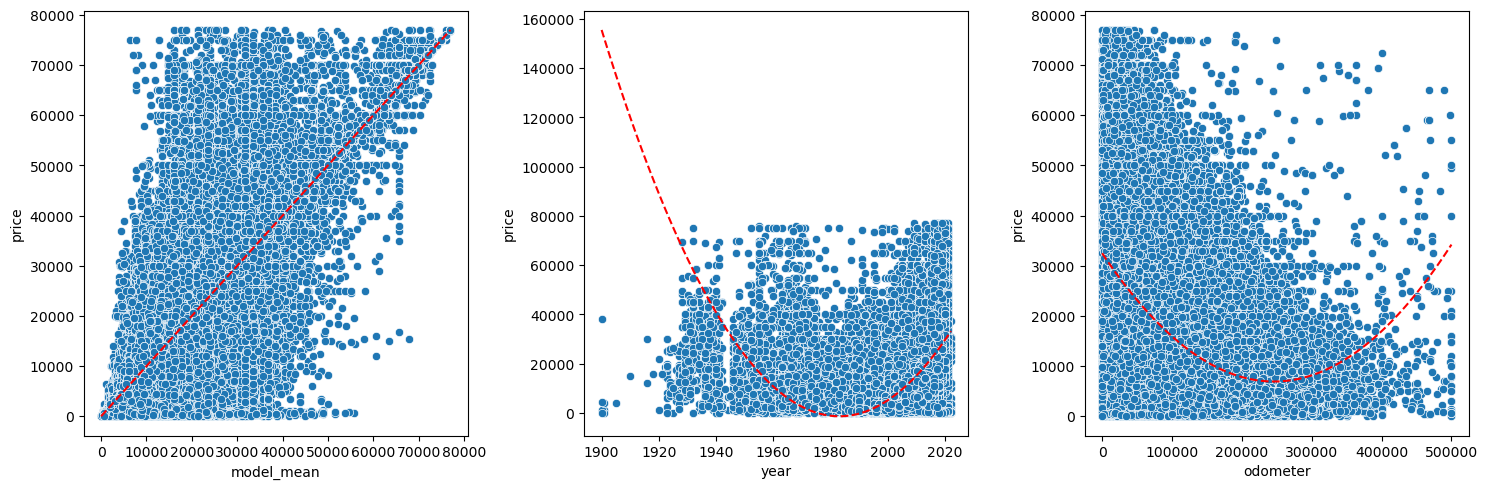

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))

# Model Mean
plt.subplot(1, 3, 1) 
sns.scatterplot(x=X_train['model_mean'], y=y_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['model_mean']])
model = LinearRegression().fit(X_poly, y_train) 
x = np.linspace(X_train['model_mean'].min(), X_train['model_mean'].max(), 100)[:,np.newaxis]
x_poly = poly.transform(x)
y = model.predict(x_poly)
plt.plot(x, y, c='red', ls='--')

# Year 
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_train['year'], y=y_train)
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X_train[['year']])
model = LinearRegression().fit(X_poly, y_train)
x = np.linspace(X_train['year'].min(), X_train['year'].max(), 100)[:,np.newaxis] 
x_poly = poly.transform(x)
y = model.predict(x_poly)  
plt.plot(x, y, c='red', ls='--')

# Odometer
plt.subplot(1, 3, 3)  
sns.scatterplot(x=X_train['odometer'], y=y_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['odometer']])  
model = LinearRegression().fit(X_poly, y_train)
x = np.linspace(X_train['odometer'].min(), X_train['odometer'].max(), 100)[:,np.newaxis]
x_poly = poly.transform(x)
y = model.predict(x_poly)
plt.plot(x, y, c='red', ls='--')

plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [33]:
#the code for best model is presented below

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
# Path to the CSV file
file_path = 'data/vehicles.csv'
df = pd.read_csv(file_path)
# Define the degree for polynomial features
# Selecting columns which are of object type
object_cols = df.select_dtypes(include=['object']).columns

# Replacing null values in these columns with "unknown"
df[object_cols] = df[object_cols].fillna('unknown')
df.drop(['VIN', 'state', 'type', 'drive', 'size', 'paint_color', 'manufacturer', 'title_status'], axis=1, inplace=True)
df = df[(df['price'] <= 77000) & (df['price'] >= 10)]
df = df[(df['odometer'] <= 500000) & (df['price'] >= 10)]
df = df.set_index('id')
numeric_cols = df.select_dtypes(include=['number']).columns
df = df.dropna(subset=numeric_cols)
condition_mapping = {'fair': 1, 'good': 2, 'unknown': 1.5, 'excellent': 3, 'like new': 4, 'new': 5, 'salvage': 0}
df['condition'] = df['condition'].map(condition_mapping)
# Dropping 'model' and 'region' columns from X_train and X_test

y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Assuming df, X_train, X_test, y_train have been defined and 'model' and 'region' columns have been removed from X_train and X_test

# Calculate the mean of y_train for each 'model' and 'region' in X_train
model_means = X_train.join(y_train).groupby('model')['price'].mean().rename('model_mean')
region_means = X_train.join(y_train).groupby('region')['price'].mean().rename('region_mean')

# Merge these means into X_train
X_train = X_train.join(model_means, on='model').join(region_means, on='region')

# Merge these means into X_test (note: models or regions not present in X_train will result in NaNs in X_test)
X_test = X_test.join(model_means, on='model').join(region_means, on='region')

# Fill NaN values in X_test with a default value (e.g., global mean of y_train)
default_model_mean = y_train.mean()
default_region_mean = y_train.mean()
X_test['model_mean'].fillna(default_model_mean, inplace=True)
X_test['region_mean'].fillna(default_region_mean, inplace=True)
X_train = X_train.drop(['model', 'region'], axis=1)
X_test = X_test.drop(['model', 'region'], axis=1)
# Convert object type variables in X_train to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)

# Convert object type variables in X_test to dummy variables
# It's important to align X_test with X_train to ensure they have the same dummy columns
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
# Now, both X_train and X_test have new columns 'model_mean' and 'region_mean'
degree = 2

# Create a pipeline with standard scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('ridge_regression', Ridge(alpha=1000.0))  # alpha is the regularization parameter
])

# Train the pipeline on the full training data
pipeline.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2e}")
print(f"Test MSE: {mse_test:.2e}")
# Calculate MAE for training and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training MAE: {mae_train:.2e}")
print(f"Test MAE: {mae_test:.2e}")

Training MSE: 4.39e+07
Test MSE: 4.94e+07
Training MAE: 4.23e+03
Test MAE: 4.48e+03


In [35]:
#Training MSE: 4.39e+07
#Test MSE: 4.94e+07
#Training MAE: 4.23e+03
#Test MAE: 4.48e+03

In [36]:
#In our recent data-driven analysis aimed at optimizing the used car sales process, we conducted a comprehensive evaluation of a large dataset of used car listings.
#Our primary focus was to understand key factors influencing car prices, thereby enabling dealers to make informed decisions on inventory and pricing. 
#To achieve this, we first cleansed the data by removing irrelevant features such as VIN, state, and manufacturer, and dealing with missing values, particularly in categorical fields like 'type' and 'paint_color'. 
#We also filtered the dataset for realistic price ranges, eliminating outliers that could skew our analysis.
#Our advanced modeling approach included the use of Ridge Regression with a 2nd-degree polynomial fit, a technique that captures non-linear relationships between features and car prices. 
#This model was trained and validated on the dataset, ensuring accuracy and reliability in its predictions. We calculated the Mean Absolute Error (MAE) for both training and test datasets, providing a clear measure of the model's prediction accuracy. 
#The insights derived from this model can guide used car dealers in setting competitive prices and understanding market trends, ultimately leading to more strategic inventory management and enhanced profitability.
#The mean absolute error was about $4480 this error reperesents one third of a standarrd deviation of sale prices
#This error could be reduced if certain other data had been collected such as the year the sale was made
#However, a sizable amount of the dscrepancy is likely due to hard to measure factors such as the negotiating skill of the dealer. 